### Aesthetics

In [1]:
install.packages(c('ranger', 'ggplot2', 'data.table'), repos="http://cloud.r-project.org/")


The downloaded source packages are in
	‘/private/var/folders/0d/tm4g6rx11sjbpz05lv633c1r0000gp/T/RtmpHpQIbN/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# Some things to make our plots pretty
options(warn=-1)
library(scales)
my_alpha <- 0.4
point_color="#756bb1"
color_scale <- c(
  "#1f78b4", "#ff7f00", "#6a3d9a", "#33a02c", "#e31a1c", "#b15928",
  "#a6cee3", "#fdbf6f", "#cab2d6", "#b2df8a", "#fb9a99", "#ffff99")

# A quick introduction to ggplot2
 - Plotting library for R
 - "grammar of graphics"
 - Build plots piece by piece, e.g. you make a scatterplot as follows:
     - Make a plot of the diamonds dataset
     - Use caret as the x axis
     - Use price as the y axis
     - Add points to the plots

In [3]:
library(ggplot2)
data(diamonds)
set.seed(42)
diamonds <- diamonds[sample(1:nrow(diamonds), 5000),]
head(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
49345,0.71,Very Good,H,SI1,62.5,60,2096,5.68,5.75,3.57
50545,0.79,Premium,H,SI1,61.8,59,2275,5.97,5.91,3.67
15434,1.03,Ideal,F,SI1,62.4,57,6178,6.48,6.44,4.03
44792,0.5,Ideal,E,VS2,62.2,54,1624,5.08,5.11,3.17
34614,0.27,Ideal,E,VS1,61.6,56,470,4.14,4.17,2.56
27998,0.3,Premium,E,VS2,61.7,58,658,4.32,4.34,2.67


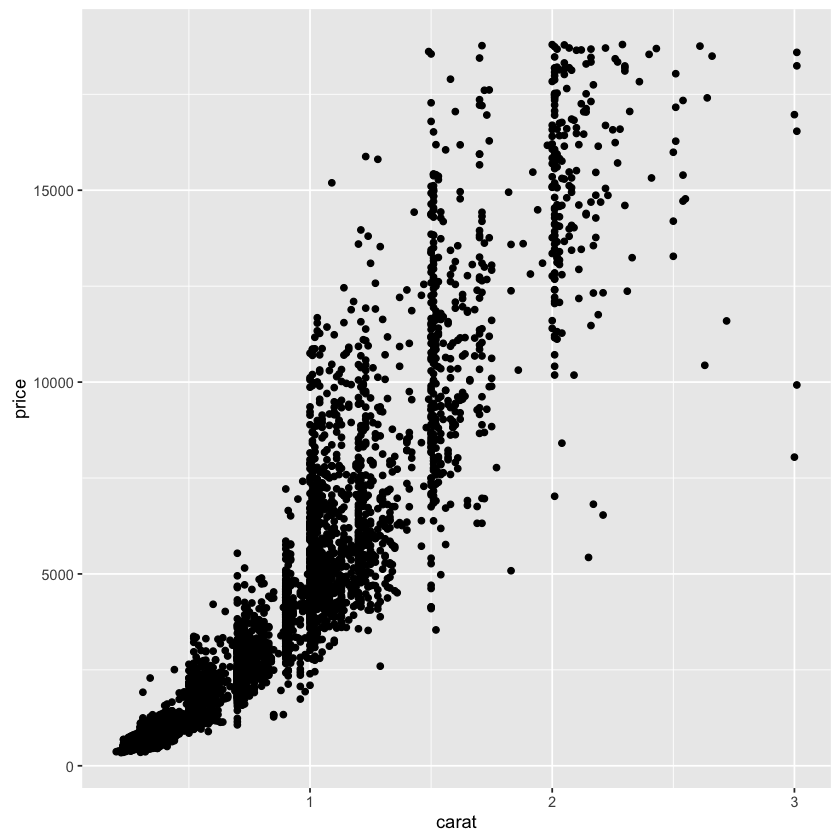

In [4]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

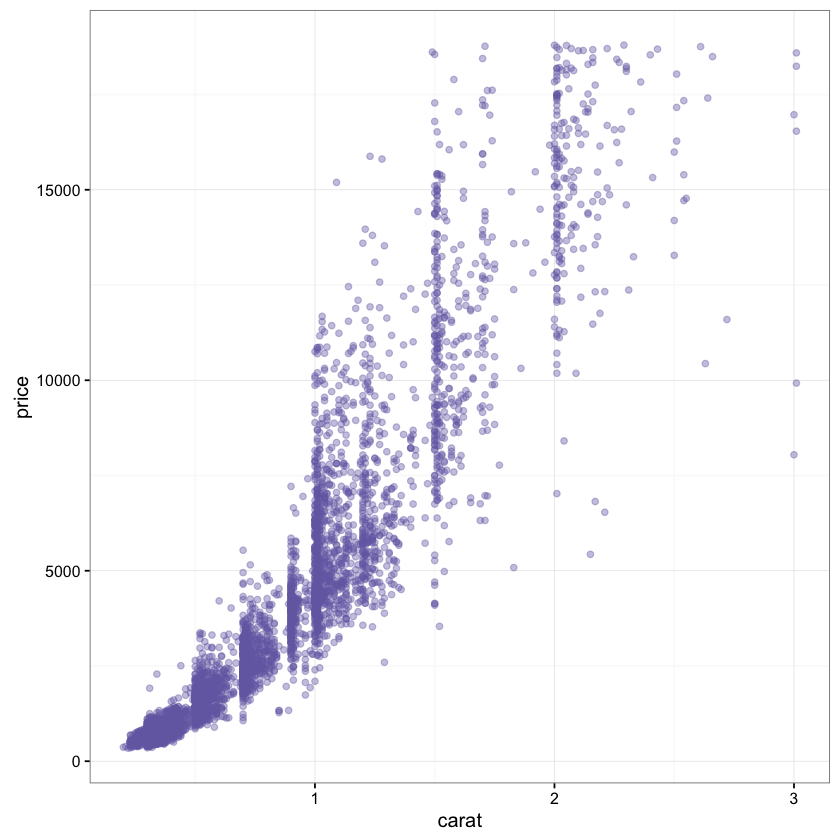

In [5]:
# Let's make our plot prettier: transparency (alpha), color, and a cleaner plot "theme"
# You can pass hex codes for color, or just name colors, e.g. "purple"
ggplot(diamonds, aes(x=carat, y=price)) + geom_point(alpha=my_alpha, color=point_color) + theme_bw()

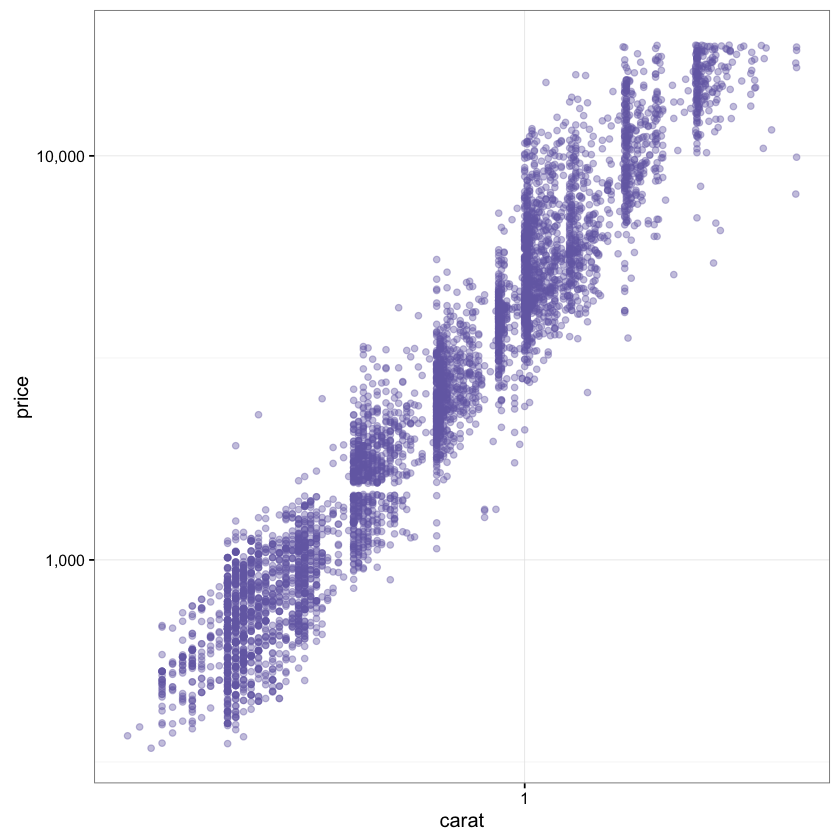

In [6]:
# Let's change the scales
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + theme_bw() + 
    scale_y_log10(labels=scales::comma) + 
    scale_x_log10()

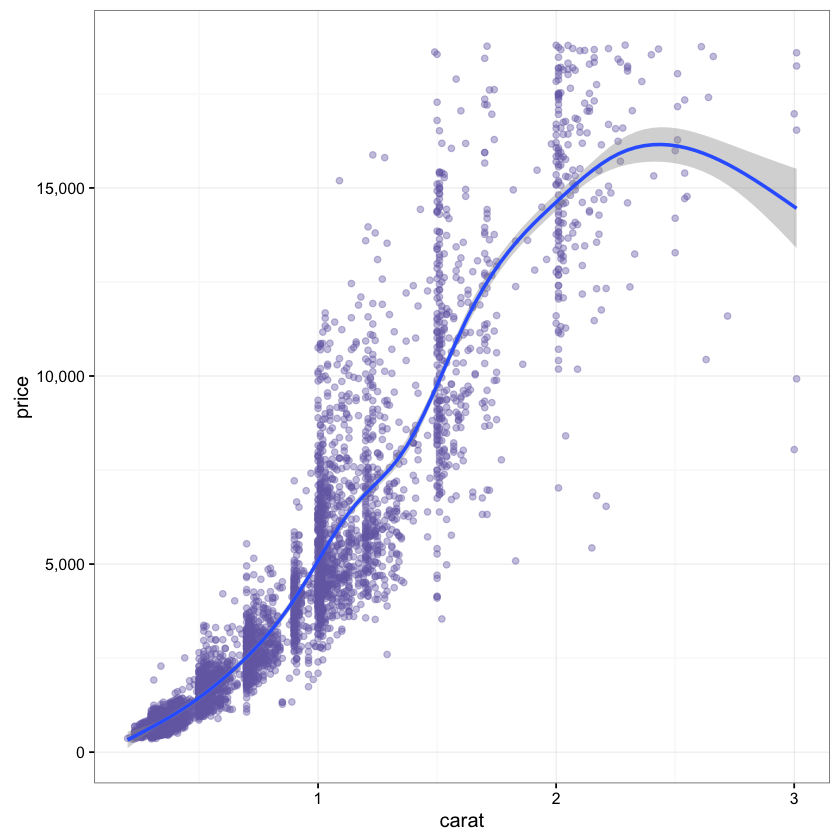

In [7]:
# Let's go back to the original scale and add a scatterplot smoother
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    geom_smooth() + 
    theme_bw()

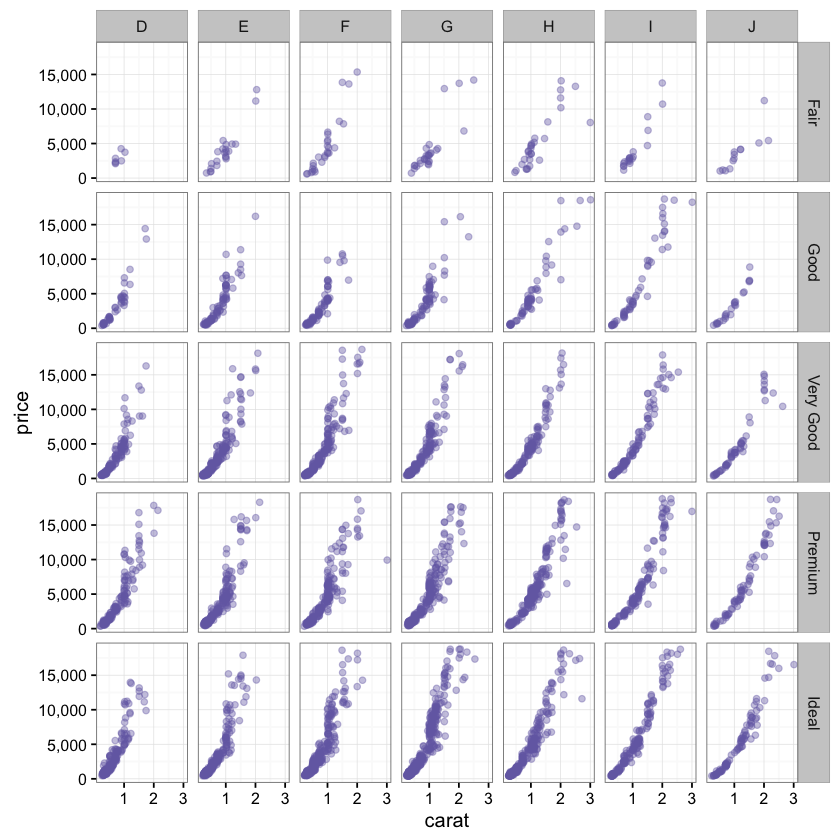

In [8]:
# Additionally, we can break the plot into panels by other variables
# Edward Tufte calls this "small multiples" and it's a very effective analytic plotting technique
ggplot(diamonds, aes(x=carat, y=price, col=clarity)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    theme_bw() + 
    facet_grid(cut ~ color)

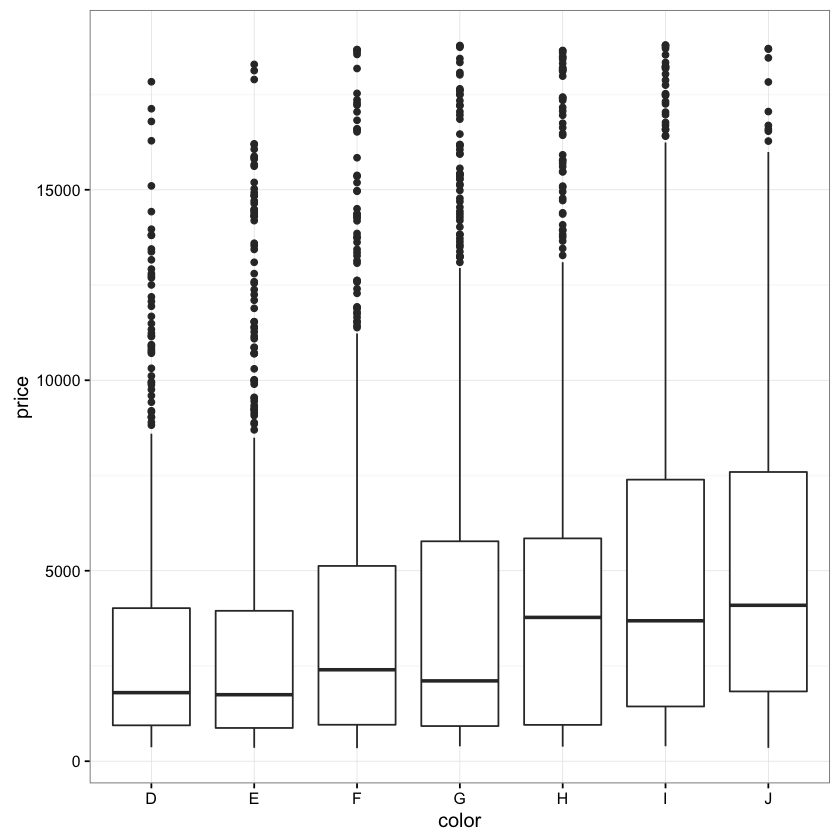

In [9]:
# I personally find scatterplots to be the most useful analytic plot
# Boxplots are very useful too:
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    theme_bw()

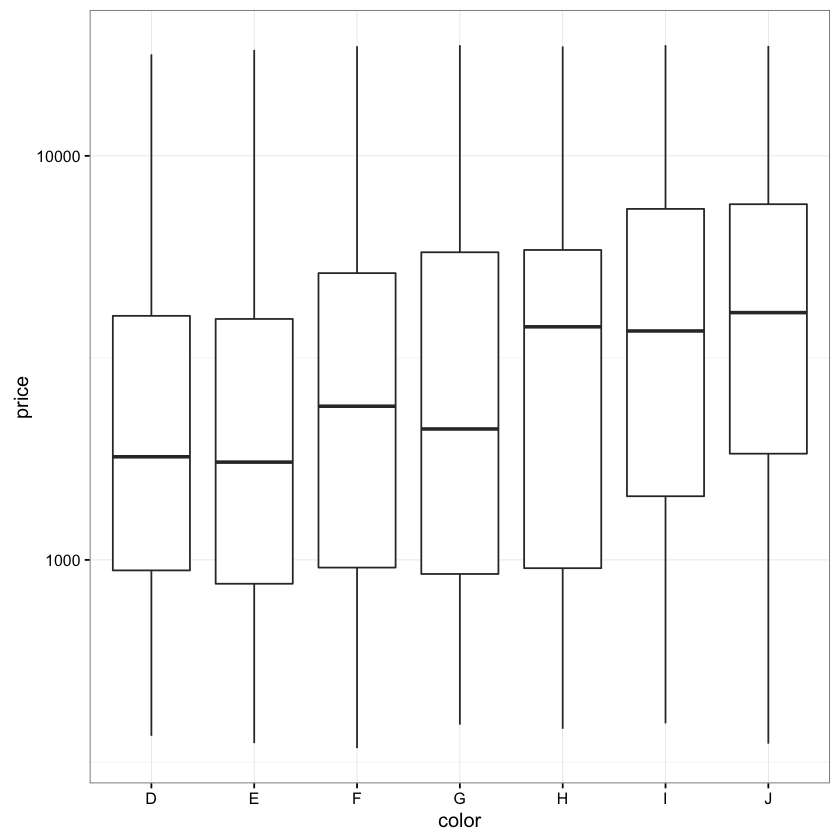

In [10]:
# You can use log scales with boxplots too
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    scale_y_log10() + 
    theme_bw()

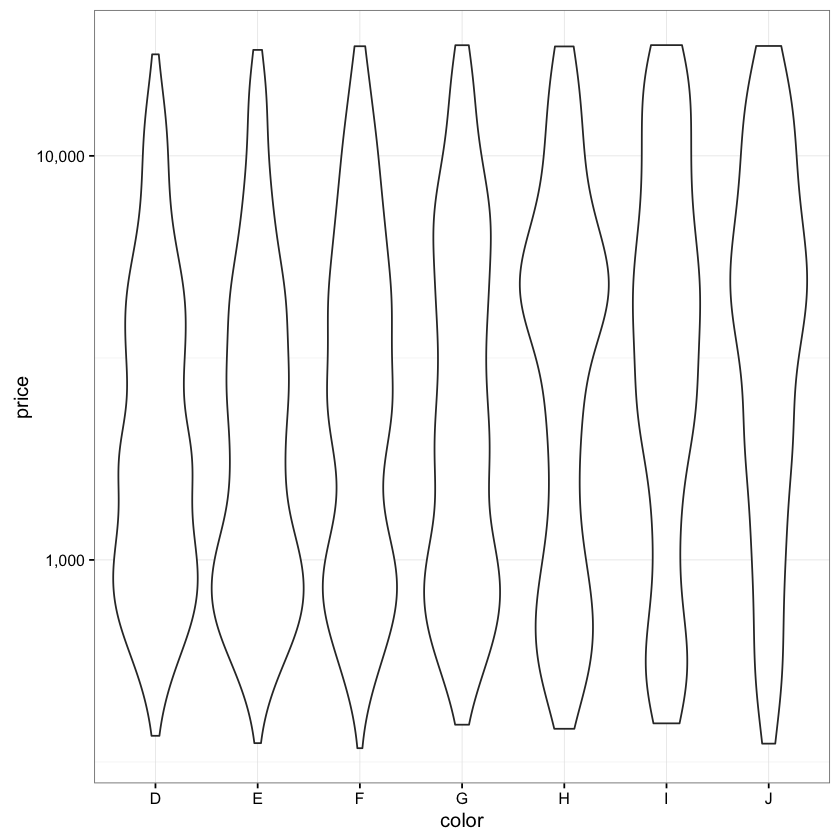

In [11]:
# Violin plots are a pretty alternative to boxplots
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_violin() + 
    theme_bw() + scale_y_log10(labels=scales::comma)

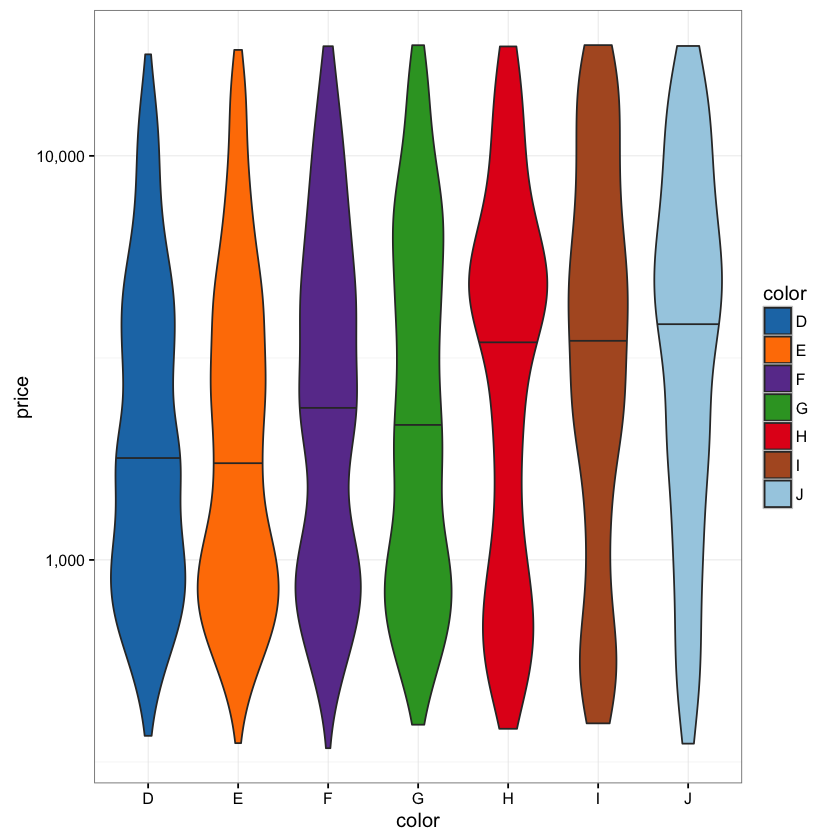

In [12]:
# We can add our own quantiles to violin plots and color them too
ggplot(diamonds, aes(x=color, y=price, fill=color)) + 
    geom_violin(draw_quantiles = c(0.50)) + 
    scale_fill_manual(values = color_scale) + 
    scale_y_log10(labels = scales::comma) +
    theme_bw()

### To Recap:
- Look at scatterplots first using geom_point()
- Add scatterplot smoothers using geom_smooth()
- Use facet_grid() to make small multiples by categorical variables
- Use boxplots to directly compare numeric variables across categories
- Use violin plots for prettier versions of box plots

# A quick introduction to data.table
- data.table is a lot like SQL
- Selection
- Aggregation
- Grouping


### data.table uses the same "[" operator as data.frame, with 2 major caveats:
- You don't need to use the "\$" sign syntax (e.g. you can just reference price, rather than diamonds$price)
- data.tables are "update on reference"

### data table syntax compared to SQL:
- dat["where clause", "select clause"]
- e.g. dat["which rows", "which columns"]
- e.g. select avg(price) from dat where carat=1
- is equivalent to dat[carat==1,mean(price)]

In [13]:
library(data.table)
dat <- data.table(diamonds)
dat[carat==1,mean(price)]

[1] 5317.442

### data table syntax compared to SQL:
- dat["where clause", "select clause", by="group by clause"]
- e.g. select avg(price) from dat where carat=1 group by cut
- is equivalent to dat[carat==1,mean(price),by='cut']

In [14]:
dat[carat==1,round(mean(price)),by='cut']

,cut,V1
1,Premium,5345
2,Ideal,6077
3,Very Good,5396
4,Fair,3900
5,Good,5214


### data table syntax compared to SQL:
- select avg(price) from dat where carat=1 group by cut order by 1 desc
- is equivalent to dat[carat==1,mean(price),by='cut'][order(V1, decreasing),]

In [15]:
dat[carat==1,round(mean(price)),by='cut'][order(V1, decreasing=TRUE),]

,cut,V1
1,Ideal,6077
2,Very Good,5396
3,Premium,5345
4,Good,5214
5,Fair,3900


### data table gives you the full power of the R language inside a SQL-like framework
- E.g. medians
- Linear regression
- And more!

In [16]:
dat[carat==1,round(median(price)),by='cut'][order(V1, decreasing=TRUE),]

,cut,V1
1,Ideal,5880
2,Premium,5340
3,Good,4872
4,Very Good,4658
5,Fair,3780


In [17]:
dat[,round(median(price)),by=list(cut, carat=round(carat))][order(V1, decreasing=TRUE),]

,cut,carat,V1
1,Good,3,18368
2,Ideal,3,17339
3,Premium,3,15498
4,Very Good,3,12916
5,Ideal,2,12816
6,Premium,2,12674
7,Very Good,2,12386
8,Fair,2,11406
9,Good,2,10471
10,Fair,3,8044


In [18]:
dat[,round(cor(carat, price), 2),by='cut'] #test

,cut,V1
1,Very Good,0.93
2,Premium,0.93
3,Ideal,0.93
4,Good,0.94
5,Fair,0.86


In [19]:
sink <- dat[,color := as.character(color)]
dat[,data.frame(round(t(coef(lm(price ~ carat + color))))),by='cut']

,cut,X.Intercept.,carat,colorE,colorF,colorG,colorH,colorI,colorJ
1,Very Good,-2405,8204,17,17,-49,-575,-961,-1737
2,Premium,-2227,8159,-86,-424,-213,-733,-1087,-1812
3,Ideal,-2217,8510,-18,20,45,-751,-1123,-2050
4,Good,-2214,7611,-43,-350,-160,-623,-443,-1482
5,Fair,-2330,6389,189,976,-177,-432,-386,-1434


### Recap
- data.table is like SQL for R
- Fast and flexible
- Great for data munging

# Now lets look at a real data problem
- Don't worry too much about following along with the code
- We'll share the jupyter notebook after the presentation
- You can look at all the gory details then
- Focus on the big picture: the data and the problem to solve
- As data scientists, this is how we approach new (potentially messy) datasets

### Load the Data

The data.table and dplyr libraries are currently among the most popular tools for data munging.  You can work productively even without them, but if you haven't used them, we think you'll like the power they provide.  

In this tutorial, we will use data.table